# DSGRN Python Interface Tutorial
This notebook shows the basics of manipulating DSGRN with the python interface.

In [1]:
import DSGRN

## Network
The starting point of the DSGRN analysis is a network specification file. We have a network specification file "network.txt" we will load.

In [2]:
network = DSGRN.Network("network.txt")

In [3]:
print(network)

X1 : (X1)(X2+~X3)
X2 : X1 
X3 : (X1)(~X2)



In [4]:
print(network.graphviz())

digraph {
bgcolor = aliceblue;X1[style=filled fillcolor=beige];
X2[style=filled fillcolor=beige];
X3[style=filled fillcolor=beige];
X2 -> X1[color=black arrowhead="normal"];
X3 -> X1[color=black arrowhead="tee"];
X1 -> X1[color=darkgoldenrod arrowhead="normal"];
X1 -> X2[color=black arrowhead="normal"];
X2 -> X3[color=black arrowhead="tee"];
X1 -> X3[color=darkgoldenrod arrowhead="normal"];
}



## Graphviz
Many of the objects in DSGRN provide a method "graphviz" which emits a string understood by the graphviz language. In an iPython notebook we can embed these picture easily.

In [5]:
import graphviz

In [6]:
graph = graphviz.Source(network.graphviz())

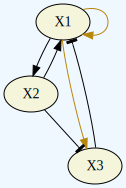

In [7]:
graph

## ParameterGraph
Given a network, there is an associated "Parameter Graph", which is a combinatorial representation of parameter space.

In [8]:
parametergraph = DSGRN.ParameterGraph(network)

In [9]:
print("There are " + str(parametergraph.size()) + " nodes in the parameter graph.")

There are 326592 nodes in the parameter graph.


## Parameter
The `ParameterGraph` class may be regarded as a factory which produces parameter nodes. In the DSGRN code, parameter nodes are referred to simply as "parameters" and are represented as "Parameter" objects.

In [10]:
parameterindex = 34892  # An integer in [0,32592)

In [11]:
parameter = parametergraph.parameter(parameterindex)

In [12]:
parameter

In [13]:
print(parameter)

[["X1",[3,3,"6D9000"],[0,2,1]],["X2",[1,2,"D"],[0,1]],["X3",[2,1,"8"],[0]]]


## DomainGraph
Let's compute the dynamics corresponding to this parameter node. In particular, we can instruct DSGRN to create a "domaingraph" object.

In [14]:
domaingraph = DSGRN.DomainGraph(parameter)

In [15]:
domaingraph

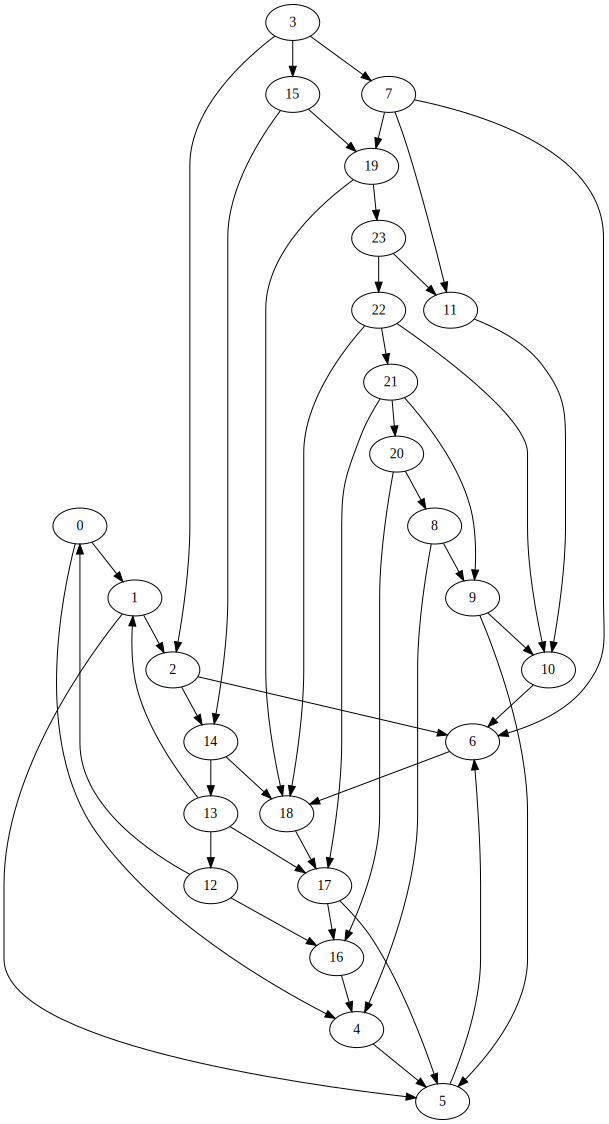

In [16]:
graphviz.Source(domaingraph.graphviz())

In [17]:
print(domaingraph.coordinates(5)) # ... I wonder what region in phase space domain 5 corresponds to.

[1, 1, 0]


## MorseDecomposition
Let's compute the partially ordered set of recurrent components (strongly connected components with an edge) of the domain graph.

In [18]:
morsedecomposition = DSGRN.MorseDecomposition(domaingraph.digraph())

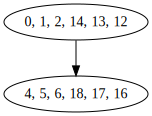

In [19]:
graphviz.Source(morsedecomposition.graphviz())

## MorseGraph
The final step in our analysis is the production of an annotated Morse graph.

In [20]:
morsegraph = DSGRN.MorseGraph()

In [21]:
morsegraph.assign(domaingraph, morsedecomposition)

In [22]:
morsegraph

In [23]:
print(morsegraph)

{"poset":[[1],[]],"annotations":[["XC {X1, X3}"],["XC {X1, X3}"]]}


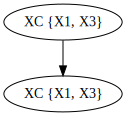

In [24]:
graphviz.Source(morsegraph.graphviz())